In [0]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#--------------------Reading Data from Google Drive------------------------

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Reading the file from Googlr Drive

data = pd.read_csv("/content/drive/My Drive/ER/Simple Linear Regression/Salary_Data.csv", sep = ',')
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [5]:
#Preview of  the data
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Text(0.5, 1.0, 'Experience vs Salary')

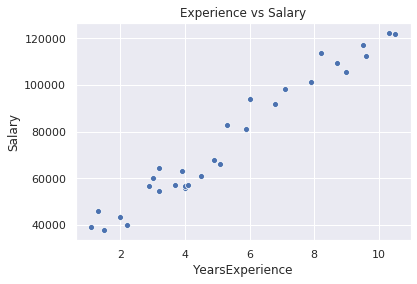

In [7]:
#Plotting Weight gained vs calories consumed graph

sns.set(style = 'darkgrid')
sns.scatterplot(x = "YearsExperience", y = "Salary", data = data)
plt.title("Experience vs Salary")

##Observations


*   We can see a clear upward trend. That is, with an increase in Experience, the salary increases.



In [0]:
#Modelling
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(data["YearsExperience"], data["Salary"], test_size = 0.15, random_state = 42)

In [9]:
#Regression Model
LR = LinearRegression()
X_train = np.reshape(list(X_train),(-1,1))
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Predicting for test data
X_test = np.reshape(list(X_test), (-1,1))
y_pred = LR.predict(X_test)

In [11]:
y_pred

array([115765.3521185 ,  71373.39796891, 102542.2168399 ,  75151.43661994,
        55316.73370204])

In [12]:
y_test

27    112635.0
15     67938.0
23    113812.0
17     83088.0
8      64445.0
Name: Salary, dtype: float64

In [13]:
#R^2 calculation.
print("R square for test data is:" , LR.score(X_test, y_test))

R square for test data is: 0.869147229126627
